In [ ]:
!pip install gTTS
!pip install librosa
!pip install noisereduce
!pip install soundfile
!pip install keras
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install numba==0.53

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
# Enable plot in the notebook
import matplotlib.pyplot as plt
# Librosa provides the audio analysis
import librosa
# Need to implictly import from librosa
import librosa.display
# Import the audio playback widget
from IPython.display import Audio
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
import noisereduce as nr
import soundfile as sf

## Load the Dataset

In [ ]:
import os
import csv

audio_folder = 'C:/Users/iamkh/Contacts/bn_bd/wavs'
tsv_file = 'C:/Users/iamkh/Contacts/bn_bd/line_index.tsv'

audio_paths = []
text_labels = []

with open(tsv_file, 'r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter='\t')
    next(reader)  # Skip header

    for row in reader:
        filename = row[0] + '.wav'
        path = os.path.join(audio_folder, filename).replace('\\', '/')
        label = row[1].lower()

        audio_paths.append(path)
        text_labels.append(label)

        if len(audio_paths) == 1890:
            break

print('Dataset is already Loaded!')

Dataset is already Loaded!


In [ ]:
audio_paths[:10]

['C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_00015581920.wav',
 'C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_00028634754.wav',
 'C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_00035050432.wav',
 'C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_00068052117.wav',
 'C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_00107291991.wav',
 'C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_00112921837.wav',
 'C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_00120125731.wav',
 'C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_00120232454.wav',
 'C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_00142194715.wav',
 'C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_00176672702.wav']

In [ ]:
# length of the dataset
len(audio_paths)

1890

In [ ]:
text_labels[:10]

['স্ট্যান্ডার্ড ব্যাংক এ ইসলামী ব্যাংকিং এর সুবিধা রয়েছে',
 'লাফার্জ সুরমা সিমেন্ট সর্বাধিক ব্যবহৃত সিমেন্ট উৎপাদন করে',
 'পিপলস ইন্স্যুরেন্স অব চায়না ছেষট্টি বছর আগে ব্যবসা চালু করে',
 'বয়গেস একটি ইন্ডাস্ট্রিয়াল গ্রুপ',
 'কেয়া ডেভেলপারস দেশের বিভিন্ন স্থানে স্থাপনা তৈরি করে থাকে',
 'ভেরাইজন কমিউনিকেশনস একটি আমেরিকান ব্রডব্যান্ড ও টেলিযোগাযোগ কোম্পানি',
 'মেটলাইফ বিশ্বের দ্রুত বিস্তৃত ইন্স্যুরেন্স কোম্পানি',
 'সাইফ পাওয়ারটেক প্রাইভেট কোম্পানি হিসেবে নিবন্ধিত এবং পরিচালিত',
 'অলিম্পিক ইন্ডাস্ট্রিজ জীবনকে সহজ করে তুলেছে',
 'বেইজিং অটোমোটিভ গ্রুপ একটি চীনা রাষ্ট্রীয় উদ্যোগ ও নিয়ন্ত্রণকারী কোম্পানি']

In [ ]:
# Create a dataframe
dataset = pd.DataFrame()
dataset['speech'] = audio_paths
dataset['label'] = text_labels
dataset.head()

,speech,label
0,C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_0...,স্ট্যান্ডার্ড ব্যাংক এ ইসলামী ব্যাংকিং এর সুবি...
1,C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_0...,লাফার্জ সুরমা সিমেন্ট সর্বাধিক ব্যবহৃত সিমেন্ট...
2,C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_0...,পিপলস ইন্স্যুরেন্স অব চায়না ছেষট্টি বছর আগে ব্...
3,C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_0...,বয়গেস একটি ইন্ডাস্ট্রিয়াল গ্রুপ
4,C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_0...,কেয়া ডেভেলপারস দেশের বিভিন্ন স্থানে স্থাপনা ত...


In [ ]:
dataset.tail()

,speech,label
1885,C:/Users/iamkh/Contacts/bn_bd/wavs/ban_03042_0...,ঢাকা ময়মনসিংহ মহাসড়ক এ থাকতে অল্প ডান দিক ধরুন
1886,C:/Users/iamkh/Contacts/bn_bd/wavs/ban_03042_0...,দা লর্ড অফ দা রিংস বইয়ে যা রয়েছ
1887,C:/Users/iamkh/Contacts/bn_bd/wavs/ban_03042_0...,বাড়ি।
1888,C:/Users/iamkh/Contacts/bn_bd/wavs/ban_03042_0...,রবিবারে সাত নভেম্বর দুই হাজার বারো সাল।
1889,C:/Users/iamkh/Contacts/bn_bd/wavs/ban_03042_0...,ড্রিউ ব্রীস এর পাঁচটি পাস ডিফেন্ড হয়েছে।


In [ ]:
dataset.shape

(1890, 2)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   speech  1890 non-null   object
 1   label   1890 non-null   object
dtypes: object(2)
memory usage: 29.7+ KB


In [ ]:
# checking the null value
dataset.isnull().sum()

speech    0
label     0
dtype: int64

In [ ]:
# count the all label
dataset['label'].value_counts()

ঢাকা আরিচা মহাসড়ক এ থাকতে সোজা চলতে থাকুন               4
ঢাকা ময়মনসিংহ মহাসড়ক এর সাথে চলতে থাকুন                4
কুষ্টিয়া ঝিনাইদহ মহাসড়ক এর সাথে চলতে থাকুন             4
ঢাকা ময়মনসিংহ মহাসড়ক এ বাম দিকে বাঁক নিন               4
ফরিদপুর ভাঙ্গা মহাসড়ক অনুসরণ করতে থাকুন                 3
                                                        ..
মৎস ভবন পর্যন্ত সোজা চলতে থাকুন                          1
ইআই এআই দুই বাংলাদেশ থেকে নেপালের জন্য অপসারিত হয়েছে    1
তাপসের পাঁচটি ইঞ্জুরি রয়েছে                             1
একমি কম্পিউটার পণ্য পর্দা এর আকৃতি হল লিনাক্স।           1
ড্রিউ ব্রীস এর পাঁচটি পাস ডিফেন্ড হয়েছে।                1
Name: label, Length: 1847, dtype: int64

## Load and play the audio

In [ ]:
audio, sampling_rate = librosa.load('C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_00015581920.wav')
# To play audio this in the jupyter notebook
ipd.Audio('C:/Users/iamkh/Contacts/bn_bd/wavs/ban_00737_00015581920.wav')

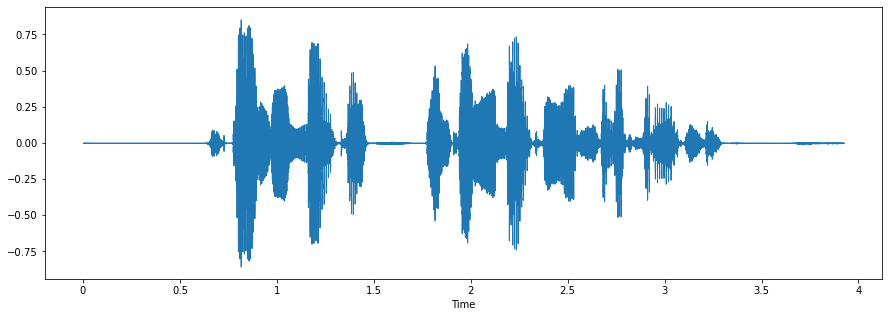

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(audio, sr=sampling_rate)

## Noisy Reduction from Audio

Original audio file:
Noise removed audio file:


TypeError: 'module' object is not callable

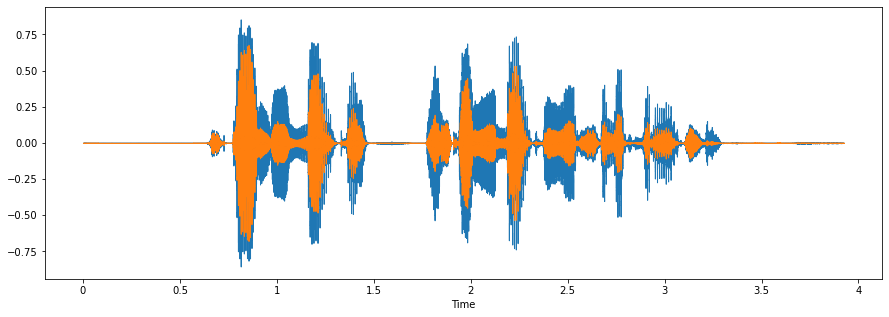

In [ ]:
 # Adjust the size of the noise sample as needed
noise_sample = audio[:22000]

# Apply noise reduction to the entire audio
audio_denoised = nr.reduce_noise(y=audio, y_noise=noise_sample, sr=sampling_rate)

plt.figure(figsize=(15, 5))
# Visualize
print("Original audio file:")
librosa.display.waveshow(audio, sr=sampling_rate)
print("Noise removed audio file:")
librosa.display.waveshow(audio_denoised, sr=sampling_rate)
librosa.display(audio_denoised)

## Waveform and Spectogram function

In [ ]:
# plt.title(title, fontproperties=fm.FontProperties(fname='path_to_bengali_font_file.ttf'))
import matplotlib.font_manager as fm

In [ ]:
def waveplot(audio_data, sr, b_text):
    noise_sample = audio_data[:22000]
    # Apply noise reduction to the entire audio
    denoised_audio = nr.reduce_noise(y=audio_data, y_noise=noise_sample, sr=sr)

    plt.figure(figsize=(10,4))
    plt.title(b_text, size=20, fontproperties=fm.FontProperties(fname=r'C:\Windows\Fonts\SiyamRupali.ttf'))
    librosa.display.waveshow(denoised_audio, sr=sr)
    plt.show()

def spectogram(audio_data, sr, b_text):
    noise_sample = audio_data[:22000]
    # Apply noise reduction to the entire audio
    denoised_audio = nr.reduce_noise(y=audio_data, y_noise=noise_sample, sr=sr)

    x = librosa.stft(denoised_audio)
    x_db = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(b_text, size=20, fontproperties=fm.FontProperties(fname=r'C:\Windows\Fonts\SiyamRupali.ttf'))
    librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

## Waveform and Spectogram Analysis

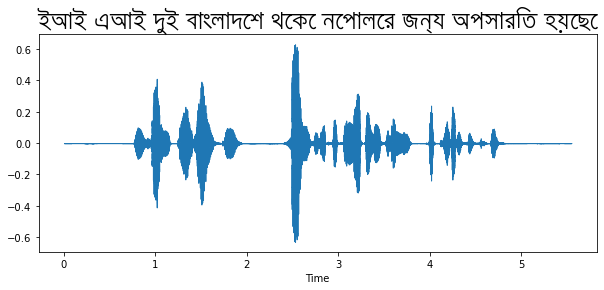

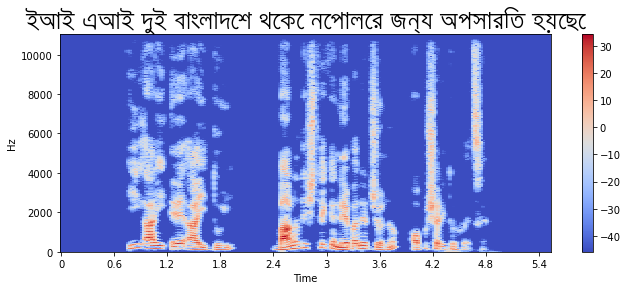

In [ ]:
b_text = 'ইআই এআই দুই বাংলাদেশ থেকে নেপালের জন্য অপসারিত হয়েছে'
path = np.array(dataset['speech'][dataset['label']==b_text])[0]
audio_data, sampling_rate = librosa.load(path)
waveplot(audio_data, sampling_rate, b_text)
spectogram(audio_data, sampling_rate, b_text)
Audio(path)

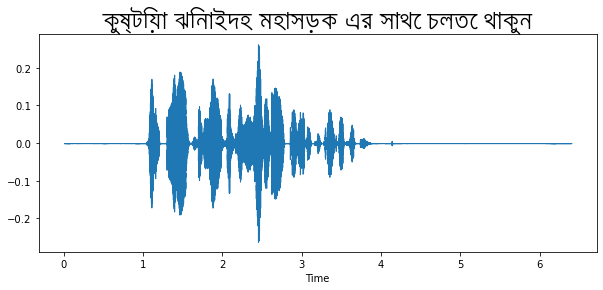

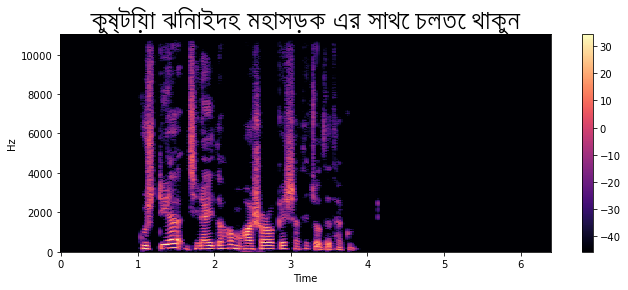

In [ ]:
b_text = 'কুষ্টিয়া ঝিনাইদহ মহাসড়ক এর সাথে চলতে থাকুন'
path = np.array(dataset['speech'][dataset['label']==b_text])[0]
audio_data, sampling_rate = librosa.load(path)
waveplot(audio_data, sampling_rate, b_text)
spectogram(audio_data, sampling_rate, b_text)
Audio(path)

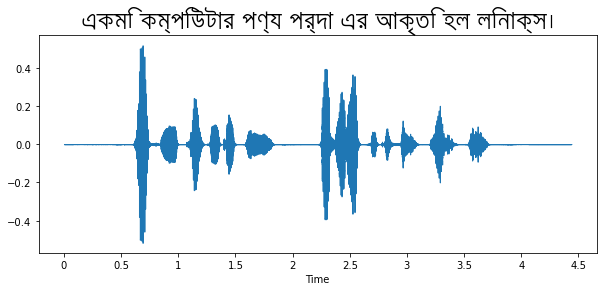

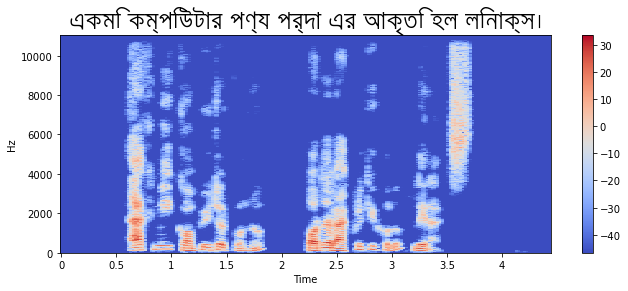

In [ ]:
b_text = 'একমি কম্পিউটার পণ্য পর্দা এর আকৃতি হল লিনাক্স।'
path = np.array(dataset['speech'][dataset['label']==b_text])[0]
audio_data, sampling_rate = librosa.load(path)
waveplot(audio_data, sampling_rate, b_text)
spectogram(audio_data, sampling_rate, b_text)
Audio(path)

In [ ]:
b_text = 'ভেরাইজন কমিউনিকেশনস একটি আমেরিকান ব্রডব্যান্ড ও টেলিযোগাযোগ কোম্পানি'
path = np.array(dataset['speech'][dataset['label']==b_text])[0]
audio_data, sampling_rate = librosa.load(path)
waveplot(audio_data, sampling_rate, b_text)
spectogram(audio_data, sampling_rate, b_text)
Audio(path)

## Text to Speech Using gTTS

In [ ]:
from gtts import gTTS
from IPython.display import Audio, display

def convert_text_to_audio(text, output_file):
    # Convert text to speech using gTTS
    speech = gTTS(text=text, lang='bn')
    speech.save(output_file)

def analyze_audio(audio_file):
    # Load audio file using librosa
    audio, sr = librosa.load(audio_file)


# Read the line_indexed.tsv file and Specify the audio folder name
tsv_file = 'line_index.tsv'
audio_folder = 'C:/Users/iamkh/Contacts/bn_bd/tts_files'

# Create the audio folder if it doesn't exist
if not os.path.exists(audio_folder):
    os.makedirs(audio_folder)

with open(tsv_file, 'r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter='\t')
    next(reader)  # Skip header

    # Generate and analyze audio for the first 6 rows
    for i, row in enumerate(reader):
        if i >= 10:
            break

        audio_id = row[0]
        text = row[1]

        # Convert text to audio
        audio_file = f'{audio_id}.mp3'
        audio_path = os.path.join(audio_folder, audio_file)
        convert_text_to_audio(text, audio_path)

        # Analyze the audio
        analyze_audio(audio_path)

        print(f'Audio analyzed: {audio_path}')

        # Play the audio
        display(Audio(audio_path))




Audio analyzed: C:/Users/iamkh/Contacts/bn_bd/tts_files\ban_00737_00015581920.mp3


Audio analyzed: C:/Users/iamkh/Contacts/bn_bd/tts_files\ban_00737_00028634754.mp3


Audio analyzed: C:/Users/iamkh/Contacts/bn_bd/tts_files\ban_00737_00035050432.mp3


Audio analyzed: C:/Users/iamkh/Contacts/bn_bd/tts_files\ban_00737_00068052117.mp3


Audio analyzed: C:/Users/iamkh/Contacts/bn_bd/tts_files\ban_00737_00107291991.mp3


Audio analyzed: C:/Users/iamkh/Contacts/bn_bd/tts_files\ban_00737_00112921837.mp3


Audio analyzed: C:/Users/iamkh/Contacts/bn_bd/tts_files\ban_00737_00120125731.mp3


Audio analyzed: C:/Users/iamkh/Contacts/bn_bd/tts_files\ban_00737_00120232454.mp3


Audio analyzed: C:/Users/iamkh/Contacts/bn_bd/tts_files\ban_00737_00142194715.mp3


Audio analyzed: C:/Users/iamkh/Contacts/bn_bd/tts_files\ban_00737_00176672702.mp3


## Feature extraction MMFC

In [ ]:
def feature_extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    return np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

In [ ]:
feature_extract_mfcc(dataset['speech'][0])

array([-2.8033237e+02,  8.6973740e+01, -1.5695739e+01,  2.8711861e+01,
        1.3537495e+01,  1.2670880e+01, -1.4564988e+01, -1.1878416e+01,
       -9.5432234e+00, -1.2821991e+01, -3.9965594e+00, -9.4109640e+00,
       -9.3686829e+00,  4.4251447e+00, -3.5970693e+00, -1.2041897e+00,
       -8.5276852e+00, -4.6431150e+00, -4.3065171e+00, -5.1725254e+00,
       -1.0825235e+01, -3.0430987e+00, -2.6906290e+00, -6.6495972e+00,
       -4.8188882e+00, -2.7994380e+00, -6.0511737e+00, -2.9937615e+00,
       -3.7558119e+00, -1.8398432e+00, -3.8971910e+00, -2.5677123e+00,
       -2.6636631e+00,  1.0585406e+00, -3.8856560e-01, -1.2107750e+00,
       -1.6062320e+00,  2.0272860e-01, -2.4521542e+00, -7.5584006e-01],
      dtype=float32)

In [ ]:
mfcc = dataset['speech'].apply(lambda x: feature_extract_mfcc(x))
mfcc

0       [-280.33237, 86.97374, -15.695739, 28.71186, 1...
1       [-302.62167, 85.96504, -7.0853076, 19.973202, ...
2       [-257.65268, 84.538536, -9.666062, 27.010855, ...
3       [-394.52274, 75.52204, 5.6841598, 21.29183, 14...
4       [-241.7839, 109.137596, -11.217349, 26.754805,...
                              ...                        
1885    [-280.43658, 104.72729, -24.725292, 21.51736, ...
1886    [-279.83878, 101.29047, -17.897503, 30.736929,...
1887    [-506.65945, 44.31878, 0.7993932, 19.802023, 6...
1888    [-307.12567, 96.40345, -20.634758, 24.124926, ...
1889    [-291.24707, 73.75259, -11.926292, 39.1452, 6....
Name: speech, Length: 1890, dtype: object

In [ ]:
X=[x for x in mfcc]
X=np.array(X)
X.shape

(1890, 40)

In [ ]:
X=np.expand_dims(X,-1)
X.shape

(1890, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(dataset[['label']])
y= y.toarray()

In [ ]:
y.shape

(1890, 1847)

In [ ]:
## Prepare to train, validation, and test data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y, test_size= 0.20, random_state =30)

## Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
#history = model.fit(x_train,y_train, validation_split=0.2, epochs=5, batch_size=64)